# <b>Stringent Response Modelling</b> 

In this project, we develop a a set of code to solve a set of differential equations for the modelling a feedback based concentration and rate change of some biomolecules within a bacterial cell.

The chain of reactions are as follows: 
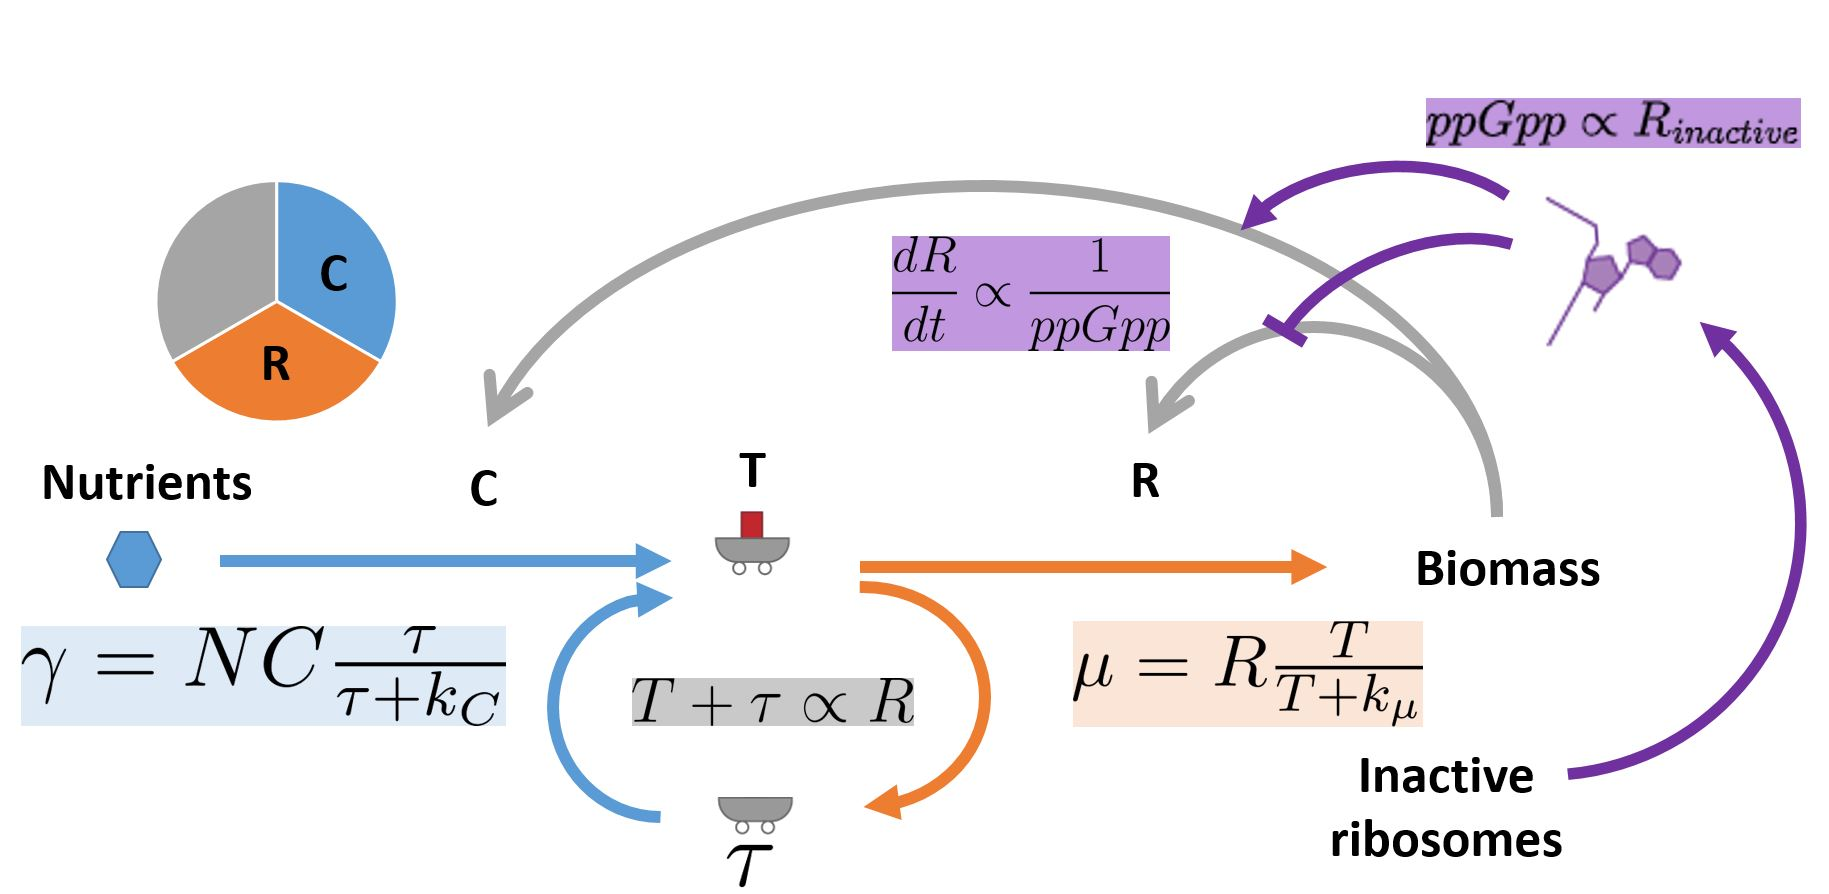

Following are the set of the equations that that we use to model the concentrations and the rates of the reactions.

### <b> The rate equations are:</b>

$$\frac{dT}{dt}=\gamma -\mu -\mu T$$

$$\frac{d\tau }{dt}=\mu -\gamma +\mu \xi R_0 \frac{k_{\Pi\rightarrow R}}{k_{\Pi\rightarrow R}+\Pi} -\mu \tau$$
$$
\frac{dR}{dt}=\mu R_0 \frac{k_{\Pi\rightarrow R}}{k_{\Pi\rightarrow R}+\Pi}-\mu R
$$
$$
\frac{d\Pi}{dt}=\Pi_0 R_{starved}-\delta\Pi
$$

### <b> The rate Constants are:</b>
$$
\gamma=N (R_{max}-R) \frac{\tau}{\tau +k_{\tau \rightarrow \gamma}}
$$

$$
\mu=\mu_{max} R \frac{T}{T+k_{T\rightarrow \mu}}
$$

$$
R_{starved}=\frac{k_{T\rightarrow \mu}}{k_{T\rightarrow \mu}+T}
$$

### <b> The Steady state equations are: </b> 
$$
\gamma =\mu (1+T)
$$

$$
T+\tau=\xi R
$$

$$
R=R_0 \frac{k_{\Pi\rightarrow R}}{k_{\Pi\rightarrow R}+\Pi}
$$

$$
\Pi=\frac{\Pi_0 R_{starved}}{\delta}
$$



 <b>T, R, $\tau$, </b> and <b>$\pi$ </b> are the values that concentrations of biomoleculee that undergo the coupled reactions and $\mu$ and $\gamma$ are the the rate constrants.


## Objective:
 <b>Solve these equations for the different values of N, O, M and I.  and observe the variation in the 
    variables for each combination of N, M O $\&$ I

After modelling this coupled set of reactions, we present the results of our calculations in the following sections.

In [71]:
import Dynamic_equations as dyneq
import scipy.integrate as spint
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
from matplotlib.ticker import (MultipleLocator)
import sys
sys.getdefaultencoding()
%matplotlib widget

## Solving for steady state 



In [63]:
import numpy as np
from scipy.optimize import fsolve

xi = 0.350335
kTOnMu = 0.001377
kTauOnGamma = 0.000176
muMax = 6.732008
gammaMax = 61.337662
Rmax = 0.281656
Ro = 1.820228
kPitoR = 2.345878
delta = 18.092349
Pi0 = 47053.186045


def non_linear_solution(var_set, NOMI):
    ### Constants
    xi = 0.350335
    kTOnMu = 0.001377
    kTauOnGamma = 0.000176
    muMax = 6.732008
    gammaMax = 61.337662
    Rmax = 0.281656
    Ro = 1.820228
    kPitoR = 2.345878
    delta = 18.092349
    Pi0 = 47053.186045
    
    ### variables
    T    = var_set[0]
    tau  = var_set[1]
    R    = var_set[2]
    Pi   = var_set[3]
    
    # Arguments to vary 
    N = NOMI[0]
    O = NOMI[1]
    M = NOMI[2]
    I = NOMI[3]

    ### Set of equations
    
    gamma = N*(Rmax-R)*tau/(tau+kTauOnGamma)
    mu = muMax*R*(1 - I)*(T/(T + kTOnMu))
    a1 = gamma - mu*(1 - T)
    a2 = mu*(1 - gamma + mu*xi*Ro*kPitoR/(kPitoR + Pi) - tau)
    a3 = mu*(Ro*(kPitoR/(kPitoR + Pi)) - R)
    a4 = Pi0*(kTOnMu/(kTOnMu + T)) + O - (delta + M)*Pi

    return np.array([a1, a2, a3, a4])


# Run the  fsolve with the initial values 

# initialize NOMI
NOMI = [1,0,0,0]

# provide a starting value for fsolve
y0 = [0.06,0.03,0.03,14.55]
#y0 = [1,1,1,1]
var_set = fsolve(non_linear_solution, y0, args = NOMI,xtol = 1E-09, maxfev = 10000);

print('The values of [T, \u03C4 , R,  \u03C0 ] for [N, O, M, I] = [1,0,0,0] is', var_set, 'respectively');


The values of [T, τ , R,  π ] for [N,O, M, I] = [1,0,0,0] is [3.19200178e-02 7.60667549e-01 3.88541851e-02 1.07553038e+02] respectively


Text(0.5, 1.0, 'Shift from poor nutrients to good nutrients')

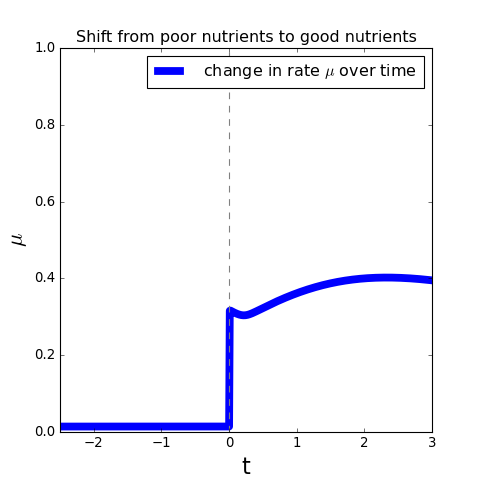

In [75]:
T_init=0.1
tau_init=0.2
R_init=0.15
Pi_init=10
variables0 = np.array([T_init,tau_init,R_init,Pi_init])

t_init = -100
t_end = 3
I = [0.0,0.0]
M = [0.0,0.0]
N = [0.001,0.5]
O = [0.0,0.0]
T,tau,R,Pi,t = dyneq.solveODEshift(t_init,t_end,variables0,I,M,N,O)
Iarray = np.ones(len(T))*I[0]
index = np.where(t==0)
Iarray[index[0][0]:] = I[1]
mu = dyneq.growth_rate(T,R,Iarray)
plt.figure(figsize = (6,6))
plt.plot(t,mu, label = " change in rate $\mu$ over time ", linewidth = 7 )
plt.xlim(-2.5,3)
plt.ylim(0,1)
plt.axvline(x=0,color = 'grey',linestyle='--')
plt.xlabel('t',fontsize = 20)
plt.ylabel(r'$\mu$',fontsize = 20)
plt.legend(loc = 'best')
plt.title("Shift from poor nutrients to good nutrients")